# OFFRE DE VACCINATION COVAX DANS LA VILLE D'ABIDJAN



## Nous avons étudié l'offre de vaccination dans la ville d'Abidjan.        

La ville d'Abidjan couvre 2 districts sanitaires et 12 districts sanitaires dont 6 par région.     
    
    - Région sanitaire de Abidjan 1 Grands Ponts      
        - DS APA (ATTECOUBE, PLATEAU, ADJAME)  
        - DS DABOU      
        - DS GRAND LAHOU      
        - DS JACQUEVILLE      
        - DS YOPOUGON EST       
        - DS YOPOUGON OUEST SONGON      
    - Région sanitaire Abidjan 2      
        - DS ABOBO EST       
        - DS ABOBO OUEST     
        - DS ANYAMA      
        - DS COCODY BINGERVILLE      
        - DS KOUMASSI PORT BOUET VRIDI      
        - DS TREICHVILLE MARCORY      

- Le fichier "sites-de-vaccination-de-covid-19-dans-le-district-d'abidjan.csv" utilisé est issu du site https://data.gouv.ci/datasets/sites-de-vaccination-de-covid-19-dans-le-district-d'abidjan        

Dans ce jeu de données, vous trouverez des informations portant sur :   

- Les districts sanitaires
- Les sites de vaccination
- Les différents points de géolocalisation des sites de vaccination
- Les numéros de téléphone des sites de vaccination
- Les jours d'ouverture
- Les horaires
- Les informations utiles    


- La liste des district sanitaire d'Abidjan a été tiré du document "Decoupage-sanitaire-2019-1.pdf" téléchargé du site http://dap.ci/wp-content/uploads/2021/04/Decoupage-sanitaire-2019-1.pdf           

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sites_covid_abidjan = pd.read_csv("sites-de-vaccination-de-covid-19-dans-le-district-d'abidjan.csv")

In [3]:
sites_covid_abidjan.head(6)

,District sanitaire,Sites de vaccination,Point GPS,Téléphone,Email,Jours d'ouverture,Horaires,Image,Infos utiles
0,Cocody,Centre Hospitalier Universitaire (CHU) de Cocody,"5.3420,-3.9936",27 22 48 10 00,NaN,Lundi-Dimanche,24H/24,http://www.atoo.ci/wp-content/uploads/2019/10/...,"Le Centre hospitalier universitaire de Cocody,..."
1,Cocody,Centre Hospitalier Universitaire (CHU) d'Angré,"5.40100,-3.95744",27 22 49 64 00,info@chuangre.ci,Lundi-Dimanche,24H/24,http://chuangre.ci/images/chu/photo-chu.jpg,"Le 5ème établissement sanitaire du pays, le CH..."
2,Bingerville,Hôpital Général (HG) de Bingerville,"5.36004,-3.88532",27 22 40 30 06,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,L'hôpital général de Bingerville est situé à B...
3,Cocody,Lycée Classique de Cocody,"5.33224,-4.00606",27 22 44 35 17,NaN,Lundi-Vendredi,7H30–16H,https://data354-public-assets.s3.eu-west-3.ama...,Le lycée classique d’Abidjan est un établissem...
4,Bingerville,Service de Santé Scolaire et Universitaire (SS...,"5.359301,-3.8845162",27 22 40 30 02,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,"Le SSU de Bingerville, anciennement appelé méd..."
5,Cocody,Dispensaire urbain de Cocody (Siège du District),"5.338866763952778, -4.004632635601998",27 22 48 53 63 - 07 07 90 07 44,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,Le dispensaire urbain de Cocody est un établis...


In [4]:
sites_covid_abidjan.shape

(59, 9)

In [5]:
sites_covid_abidjan['District sanitaire'].unique()

array(['Cocody', 'Bingerville', 'Port-Bouët', 'Yopougon Ouest',
       'Yopougon Est', 'Attecoube', 'Adjame', 'Plateau', 'Anyama',
       'Treichville', 'Marcory', 'Abobo Est', 'Abobo Ouest', 'Koumassi',
       'DS Treichville Marcory', 'DS Abobo Est', 'DS Koumassi', 'DS APA',
       'DS Yopougon Est', 'DS Port Bouet -Vidri', 'Cocody Bingerville',
       'APA', 'Plateau face à la Tour E'], dtype=object)

In [6]:
sites_covid_abidjan['District sanitaire'] = sites_covid_abidjan['District sanitaire'].replace({
    "Cocody" : "DS COCODY BINGERVILLE",
    "Bingerville" : "DS COCODY BINGERVILLE",
    "Port-Bouët" : "DS KOUMASSI P. BOUET VRIDI",
    "Yopougon Ouest" : "DS YOPOUGON OUEST",
    "Yopougon Est" : "DS YOPOUGON EST",
    "Attecoube" : "DS APA",
    "Adjame" : "DS APA",
    "Plateau" : "DS APA",
    "Anyama" : "DS Anyama",
    "Treichville" : "DS TREICHVILLE MARCORY",
    "Marcory" : "DS TREICHVILLE MARCORY",
    "Abobo Est" : "DS ABOBO EST",
    "Abobo Ouest" : "DS ABOBO OUEST",
    "Koumassi" : "DS KOUMASSI P. BOUET VRIDI",
    "DS Treichville Marcory" : "DS TREICHVILLE MARCORY",
    "DS Abobo Est" : "DS ABOBO EST",
    "DS Koumassi" : "DS KOUMASSI P. BOUET VRIDI",
    "DS Yopougon Est" : "DS YOPOUGON EST",
    "DS Port Bouet -Vidri" : "DS KOUMASSI P. BOUET VRIDI",
    "Cocody Bingerville" : "DS COCODY BINGERVILLE",
    "APA" : "DS APA",
    "Plateau face à la Tour E" : "DS APA",
    "Anyama" : "DS ANYAMA"
    
})

In [7]:
sites_covid_abidjan.dtypes

District sanitaire      object
Sites de vaccination    object
Point GPS               object
Téléphone               object
Email                   object
Jours d'ouverture       object
Horaires                object
Image                   object
Infos utiles            object
dtype: object

In [8]:
sites_covid_abidjan[['latitude', 'longitude']] = sites_covid_abidjan['Point GPS'].str.split(',', 1, expand=True)

In [9]:
sites_covid_abidjan.columns

Index(['District sanitaire', 'Sites de vaccination', 'Point GPS', 'Téléphone',
       'Email', 'Jours d'ouverture', 'Horaires', 'Image', 'Infos utiles',
       'latitude', 'longitude'],
      dtype='object')

In [10]:
sites_covid_abidjan = sites_covid_abidjan[['District sanitaire', 'Sites de vaccination', 'Point GPS', "Jours d'ouverture", 'Horaires', 'Image', 'longitude', 'latitude']]

In [11]:
sites_covid_abidjan[['longitude', 'latitude']].head()

,longitude,latitude
0,-3.9936,5.3420
1,-3.95744,5.40100
2,-3.88532,5.36004
3,-4.00606,5.33224
4,-3.8845162,5.359301


#### Les sites de vaccination qui ne sont pas géolocalisés

In [12]:
sites_covid_abidjan[sites_covid_abidjan['Point GPS'].isna()]

,District sanitaire,Sites de vaccination,Point GPS,Jours d'ouverture,Horaires,Image,longitude,latitude
22,DS ANYAMA,SSU Anyanan Lycée 1,NaN,Lundi-Vendredi,7H30-17H,https://data354-public-assets.s3.eu-west-3.ama...,NaN,NaN
23,DS ANYAMA,Centre de Santé Urbain (CSU) d'Attinguié,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,NaN,NaN
25,DS ANYAMA,Centre de Santé Urbain (CSU) de Cissé,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,NaN,NaN
26,DS ANYAMA,Dispensaire Urbain,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,NaN,NaN
28,DS ANYAMA,Centre de Santé Urbain (CSU) d'Anyaman Debarca...,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,NaN,NaN


#### L'offre de soins par district, jours et heures d'ouverture

In [13]:
sites_covid_abidjan['District sanitaire'].value_counts()

DS APA                        10
DS KOUMASSI P. BOUET VRIDI     9
DS ANYAMA                      9
DS COCODY BINGERVILLE          8
DS TREICHVILLE MARCORY         7
DS ABOBO EST                   5
DS YOPOUGON EST                4
DS ABOBO OUEST                 4
DS YOPOUGON OUEST              3
Name: District sanitaire, dtype: int64

#### 3 DS ne disposent d'aucun site de vaccination
- DS DABOU
- DS GRAND LAHOU
- DS JACQUEVILLE

In [14]:
sites_covid_abidjan["Jours d'ouverture"].value_counts()

Lundi-Dimanche    48
Lundi-Vendredi     9
Lundi-Samedi       2
Name: Jours d'ouverture, dtype: int64

In [15]:
sites_covid_abidjan["Jours d'ouverture"].value_counts(normalize=True)

Lundi-Dimanche    0.813559
Lundi-Vendredi    0.152542
Lundi-Samedi      0.033898
Name: Jours d'ouverture, dtype: float64

#### 81 % des sites de vaccination ouvre de LUNDI à DIMANCHE

In [16]:
sites_covid_abidjan.groupby(["District sanitaire", "Jours d'ouverture"])["Sites de vaccination"].count()

District sanitaire          Jours d'ouverture
DS ABOBO EST                Lundi-Dimanche       3
                            Lundi-Vendredi       2
DS ABOBO OUEST              Lundi-Dimanche       4
DS ANYAMA                   Lundi-Dimanche       8
                            Lundi-Vendredi       1
DS APA                      Lundi-Dimanche       8
                            Lundi-Vendredi       2
DS COCODY BINGERVILLE       Lundi-Dimanche       7
                            Lundi-Vendredi       1
DS KOUMASSI P. BOUET VRIDI  Lundi-Dimanche       8
                            Lundi-Vendredi       1
DS TREICHVILLE MARCORY      Lundi-Dimanche       4
                            Lundi-Samedi         2
                            Lundi-Vendredi       1
DS YOPOUGON EST             Lundi-Dimanche       3
                            Lundi-Vendredi       1
DS YOPOUGON OUEST           Lundi-Dimanche       3
Name: Sites de vaccination, dtype: int64

In [17]:
sites_covid_abidjan["Horaires"].unique()

array(['24H/24', '7H30–16H', '7H30-17H', '8H–17H', '24h/24', '6H30-21H',
       '7H30-14H30', '7H30-16H30', '7H30-18H30'], dtype=object)

In [18]:
sites_covid_abidjan["Horaires"] = sites_covid_abidjan["Horaires"].replace({
    "24h/24" : "24H/24"
})

In [19]:
sites_covid_abidjan["Horaires"].value_counts()

24H/24        48
7H30-17H       4
7H30-14H30     2
7H30–16H       1
8H–17H         1
6H30-21H       1
7H30-16H30     1
7H30-18H30     1
Name: Horaires, dtype: int64

In [20]:
sites_covid_abidjan["Horaires"].value_counts(normalize=True)

24H/24        0.813559
7H30-17H      0.067797
7H30-14H30    0.033898
7H30–16H      0.016949
8H–17H        0.016949
6H30-21H      0.016949
7H30-16H30    0.016949
7H30-18H30    0.016949
Name: Horaires, dtype: float64

#### 81 % de sites ouvre 24/24

In [21]:
sites_covid_abidjan.groupby(["District sanitaire", "Horaires"])["Sites de vaccination"].count()

District sanitaire          Horaires  
DS ABOBO EST                24H/24        3
                            7H30-17H      1
                            7H30-18H30    1
DS ABOBO OUEST              24H/24        4
DS ANYAMA                   24H/24        8
                            7H30-17H      1
DS APA                      24H/24        9
                            8H–17H        1
DS COCODY BINGERVILLE       24H/24        7
                            7H30–16H      1
DS KOUMASSI P. BOUET VRIDI  24H/24        8
                            7H30-17H      1
DS TREICHVILLE MARCORY      24H/24        3
                            6H30-21H      1
                            7H30-14H30    2
                            7H30-16H30    1
DS YOPOUGON EST             24H/24        3
                            7H30-17H      1
DS YOPOUGON OUEST           24H/24        3
Name: Sites de vaccination, dtype: int64

In [22]:
sites_covid_abidjan.groupby(["Jours d'ouverture", "Horaires"])["Sites de vaccination"].count()

Jours d'ouverture  Horaires  
Lundi-Dimanche     24H/24        47
                   6H30-21H       1
Lundi-Samedi       7H30-14H30     2
Lundi-Vendredi     24H/24         1
                   7H30-16H30     1
                   7H30-17H       4
                   7H30-18H30     1
                   7H30–16H       1
                   8H–17H         1
Name: Sites de vaccination, dtype: int64

#### 47 des 59 sites ouvre 7/7 et 24/24

#### Les sites de vaccination géolocalisés

In [23]:
sites_covid_abidjan = sites_covid_abidjan[~sites_covid_abidjan['Point GPS'].isna()]

In [24]:
sites_covid_abidjan.shape

(54, 8)

#### Seul 54 des 59 sites ont été géolocalisés. 5 sites ne seront pas représentés sur une carte. Tous du DS d'ANYAMA

In [25]:
sites_covid_abidjan['longitude'] = pd.to_numeric(sites_covid_abidjan['longitude'])

In [26]:
sites_covid_abidjan['latitude'] = pd.to_numeric(sites_covid_abidjan['latitude'])

In [27]:
sites_covid_abidjan.columns

Index(['District sanitaire', 'Sites de vaccination', 'Point GPS',
       'Jours d'ouverture', 'Horaires', 'Image', 'longitude', 'latitude'],
      dtype='object')

In [28]:
sites_covid_abidjan.dtypes

District sanitaire       object
Sites de vaccination     object
Point GPS                object
Jours d'ouverture        object
Horaires                 object
Image                    object
longitude               float64
latitude                float64
dtype: object

In [29]:
sites_covid_abidjan.Image[0]

'http://www.atoo.ci/wp-content/uploads/2019/10/CHU_de_Cocody.jpg'

In [30]:
sites_covid_abidjan_gdf = gpd.GeoDataFrame(sites_covid_abidjan, crs="EPSG:4326" , geometry=gpd.points_from_xy(sites_covid_abidjan.longitude, sites_covid_abidjan.latitude))

In [31]:
sites_covid_abidjan_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
sites_covid_abidjan_gdf.explore(column="District sanitaire")

In [33]:
sites_covid_abidjan_abobo = sites_covid_abidjan[sites_covid_abidjan['District sanitaire'].isin(['DS ABOBO EST', 'DS ABOBO OUEST', 'DS YOPOUGON EST'])]

In [34]:
sites_covid_abidjan_abobo

,District sanitaire,Sites de vaccination,Point GPS,Jours d'ouverture,Horaires,Image,longitude,latitude,geometry
14,DS YOPOUGON EST,Institut National d'Hygiène Publique (INHP) de...,"5.32555,-4.05708",Lundi-Vendredi,7H30-17H,https://data354-public-assets.s3.eu-west-3.ama...,-4.057080,5.325550,POINT (-4.05708 5.32555)
15,DS YOPOUGON EST,Centre de Santé Urbain (CSU) de Wassakara,"5.353258604467908, -4.067513325147882",Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,-4.067513,5.353259,POINT (-4.06751 5.35326)
16,DS YOPOUGON EST,Centre Medical Abobo,"5.43165,-4.02903",Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,-4.029030,5.431650,POINT (-4.02903 5.43165)
35,DS ABOBO EST,Antenne INHP Abobo Baoulé,"5.428442231943544, -3.9892519008349288",Lundi-Vendredi,7H30-18H30,https://data354-public-assets.s3.eu-west-3.ama...,-3.989252,5.428442,POINT (-3.98925 5.42844)
36,DS ABOBO EST,Centre Hospitalier Régional (CHR) d'Abobo,"5.4438666865094065, -4.005796053125675",Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,-4.005796,5.443867,POINT (-4.00580 5.44387)
37,DS ABOBO EST,Formation Sanitaire Urbain (FSU) d'Abobo Avoca...,"5.4410213255264095, -4.030965536562317",Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,-4.030966,5.441021,POINT (-4.03097 5.44102)
38,DS ABOBO EST,Lycée Moderne d'Abobo,"5.428723226664412, -4.0127971650253285",Lundi-Vendredi,7H30-17H,https://data354-public-assets.s3.eu-west-3.ama...,-4.012797,5.428723,POINT (-4.01280 5.42872)
39,DS ABOBO OUEST,Hôpital Général (HG) d'Abobo Sud,"5.424392542626464, -4.014210105335239",Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,-4.014210,5.424393,POINT (-4.01421 5.42439)
40,DS ABOBO OUEST,Centre de Santé Urbain à base Communautaire (C...,"5.438767470071786, -4.056743099559534",Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,-4.056743,5.438767,POINT (-4.05674 5.43877)
41,DS ABOBO OUEST,Formation Sanitaire Urbain à base Communautair...,"5.416512595640738, -4.031007937187406",Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,-4.031008,5.416513,POINT (-4.03101 5.41651)


In [35]:
sites_covid_abidjan_abobo.loc[16]['Image']

'https://data354-public-assets.s3.eu-west-3.amazonaws.com/data.gouv.ci/images_vignettes/csu.jpg'

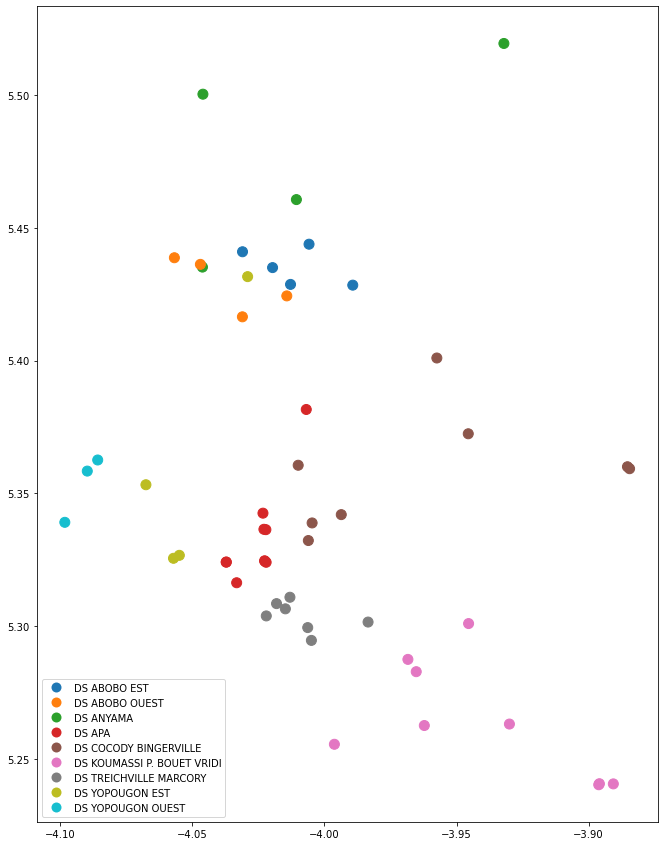

In [36]:
sites_covid_abidjan_gdf.plot(column="District sanitaire", figsize=(15,15), legend=True, markersize=100)
plt.show()

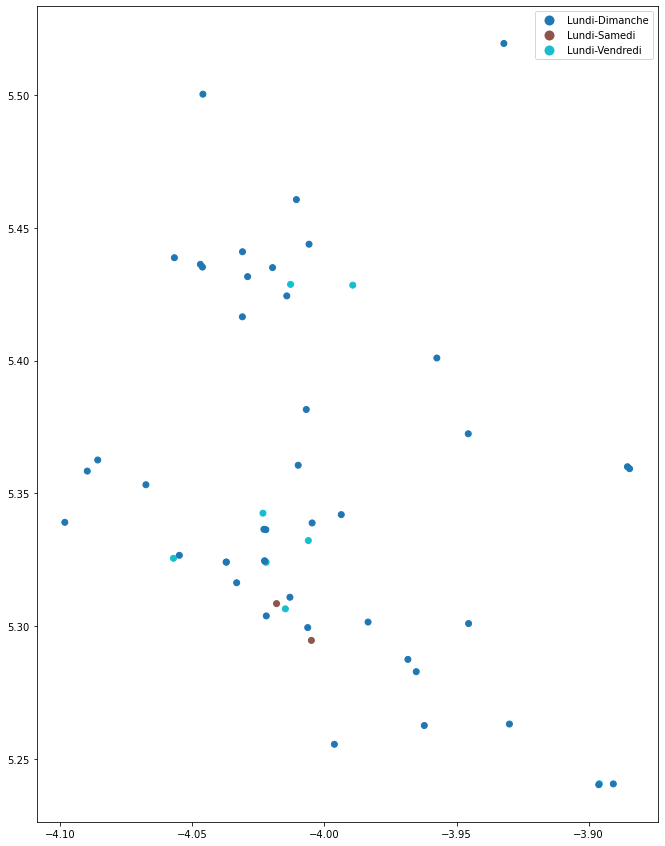

In [37]:
sites_covid_abidjan_gdf.plot(column="Jours d'ouverture", figsize=(15,15), legend=True)
plt.show()

In [38]:
sites_covid_abidjan_gdf.head()

,District sanitaire,Sites de vaccination,Point GPS,Jours d'ouverture,Horaires,Image,longitude,latitude,geometry
0,DS COCODY BINGERVILLE,Centre Hospitalier Universitaire (CHU) de Cocody,"5.3420,-3.9936",Lundi-Dimanche,24H/24,http://www.atoo.ci/wp-content/uploads/2019/10/...,-3.993600,5.342000,POINT (-3.99360 5.34200)
1,DS COCODY BINGERVILLE,Centre Hospitalier Universitaire (CHU) d'Angré,"5.40100,-3.95744",Lundi-Dimanche,24H/24,http://chuangre.ci/images/chu/photo-chu.jpg,-3.957440,5.401000,POINT (-3.95744 5.40100)
2,DS COCODY BINGERVILLE,Hôpital Général (HG) de Bingerville,"5.36004,-3.88532",Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,-3.885320,5.360040,POINT (-3.88532 5.36004)
3,DS COCODY BINGERVILLE,Lycée Classique de Cocody,"5.33224,-4.00606",Lundi-Vendredi,7H30–16H,https://data354-public-assets.s3.eu-west-3.ama...,-4.006060,5.332240,POINT (-4.00606 5.33224)
4,DS COCODY BINGERVILLE,Service de Santé Scolaire et Universitaire (SS...,"5.359301,-3.8845162",Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,-3.884516,5.359301,POINT (-3.88452 5.35930)


In [39]:
import folium

In [40]:
abidjan_location = [5.316667, -4.033333]

In [41]:
abidjan_map = folium.Map(location=abidjan_location, zoom_start=12)
folium.GeoJson(sites_covid_abidjan_gdf.geometry).add_to(abidjan_map)

for row in sites_covid_abidjan_gdf.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + ' ' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map)
display(abidjan_map)

#### Carte des sites de vaccination géolocalisés sur google earth

In [42]:
folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
).add_to(abidjan_map)
for row in sites_covid_abidjan_gdf.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + ' ' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map)
display(abidjan_map)

In [43]:
#### zone tampon

In [44]:
sites_covid_abidjan_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
sites_covid_abidjan_gdf_utm_2043 = sites_covid_abidjan_gdf.to_crs(epsg=2043)

In [46]:
sites_covid_abidjan_gdf_utm_2043_buffered_1_km = sites_covid_abidjan_gdf_utm_2043.copy()

In [47]:
sites_covid_abidjan_gdf_utm_2043_buffered_1_km['geometry'] = sites_covid_abidjan_gdf_utm_2043_buffered_1_km.apply(lambda row:row.geometry.buffer(1000),axis=1)

In [48]:
abidjan_location

[5.316667, -4.033333]

#### Zone couverte dans un rayon de 1 km des sites de vaccination

In [49]:
abidjan_map_1 = folium.Map(location=abidjan_location, zoom_start=12)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043.geometry).add_to(abidjan_map_1)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043_buffered_1_km.geometry).add_to(abidjan_map_1)


for row in sites_covid_abidjan_gdf_utm_2043.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + '\n' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map_1)
display(abidjan_map_1)

#### Zone couverte dans un rayon de 3 km des sites de vaccination

In [50]:
sites_covid_abidjan_gdf_utm_2043_buffered_3_km = sites_covid_abidjan_gdf_utm_2043.copy()

In [51]:
sites_covid_abidjan_gdf_utm_2043_buffered_3_km['geometry'] = sites_covid_abidjan_gdf_utm_2043_buffered_3_km.apply(lambda row:row.geometry.buffer(3000),axis=1)

In [52]:
abidjan_map_2 = folium.Map(location=abidjan_location, zoom_start=12)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043.geometry).add_to(abidjan_map_2)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043_buffered_3_km.geometry).add_to(abidjan_map_2)


for row in sites_covid_abidjan_gdf_utm_2043.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + '\n' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map_2)
display(abidjan_map_2)

#### Zone couverte dans un rayon de 5 km des sites de vaccination

In [53]:
sites_covid_abidjan_gdf_utm_2043_buffered_5_km = sites_covid_abidjan_gdf_utm_2043.copy()

In [54]:
sites_covid_abidjan_gdf_utm_2043_buffered_5_km['geometry'] = sites_covid_abidjan_gdf_utm_2043_buffered_5_km.apply(lambda row:row.geometry.buffer(5000),axis=1)

In [55]:
abidjan_map_3 = folium.Map(location=abidjan_location, zoom_start=12)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043.geometry).add_to(abidjan_map_3)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043_buffered_5_km.geometry).add_to(abidjan_map_3)


for row in sites_covid_abidjan_gdf_utm_2043.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + '\n' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map_3)
display(abidjan_map_3)

# Conclusion

 - Seul 9 des 12 DS disposaient de sites de vaccination
 - Plus de 80 % ouvraient tous les jours de la semaine
 - Plus de 80 % ouvraient 24/24       
 - 47 des 59 sites ouvraient 7/24 soit presque 80 %
 - Presque tous les quartiers d'Abidjan se retrouvaient à moins de 3 km d'un site de vaccination
 

Pour une analyse plus complète nous aurions souhaité avoir:       

    - La liste actualisée des sites de vaccination et de dépistage
    - Les shapefiles des DS sanitaires avec leur démographie